##Practical-6

Dataset:
  Instructor  Gender  Evaluation
0          A    Male         4.2
1          B  Female         4.5
2          C    Male         4.0
3          D  Female         4.7
4          E    Male         3.8
5          F  Female         4.6
6          G    Male         4.1
7          H  Female         4.9
8          I    Male         3.9
9          J  Female         4.8

T-test Results:
T-statistic: -7.0000
P-value: 0.0001

 Conclusion: Gender significantly affects teaching evaluation ratings.


C:\Users\thaku\AppData\Local\Temp\ipykernel_10728\2593972632.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_eval, female_eval], labels=['Male', 'Female'])


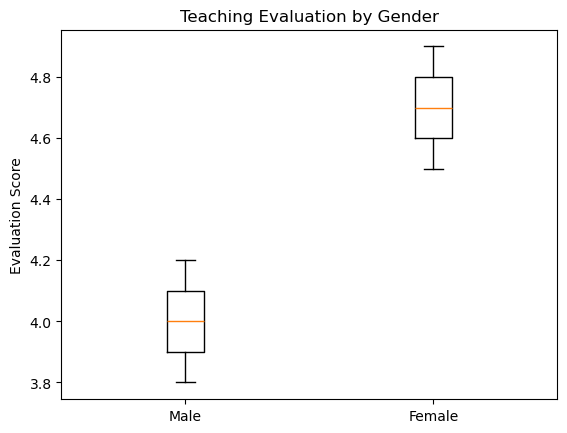

In [3]:
# Q.1

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


#  Create the dataset directly in code

data = {
    'Instructor': ['A','B','C','D','E','F','G','H','I','J'],
    'Gender': ['Male','Female','Male','Female','Male','Female','Male','Female','Male','Female'],
    'Evaluation': [4.2, 4.5, 4.0, 4.7, 3.8, 4.6, 4.1, 4.9, 3.9, 4.8]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Separate evaluation scores by gender

male_eval = df[df['Gender'] == 'Male']['Evaluation']
female_eval = df[df['Gender'] == 'Female']['Evaluation']


#  Perform Independent t-test

t_stat, p_val = stats.ttest_ind(male_eval, female_eval, equal_var=False)

print("\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


#  Interpretation

if p_val < 0.05:
    print("\n Conclusion: Gender significantly affects teaching evaluation ratings.")
else:
    print("\n Conclusion: No significant difference between male and female ratings.")


#  Visualization

plt.boxplot([male_eval, female_eval], labels=['Male', 'Female'])
plt.title("Teaching Evaluation by Gender")
plt.ylabel("Evaluation Score")
plt.show()


#Result         

p-value < 0.05 

p-value ≥ 0.05 

#Conclusion

Gender does significantly affect evaluation ratings.  

Gender does not significantly affect evaluation ratings. 

Dataset:
   Instructor Age_Group  Beauty_Score
0           A     Young           6.5
1           B     Young           7.0
2           C     Young           6.8
3           D    Middle           5.5
4           E    Middle           5.8
5           F    Middle           6.0
6           G       Old           4.8
7           H       Old           5.0
8           I       Old           4.6
9           J    Senior           3.9
10          K    Senior           4.1
11          L    Senior           3.8

ANOVA Results:
F-statistic: 94.4327
P-value: 0.0000

 Conclusion: Beauty scores differ significantly by age group.


C:\Users\thaku\AppData\Local\Temp\ipykernel_10728\1897921234.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([young, middle, old, senior], labels=['Young', 'Middle', 'Old', 'Senior'])


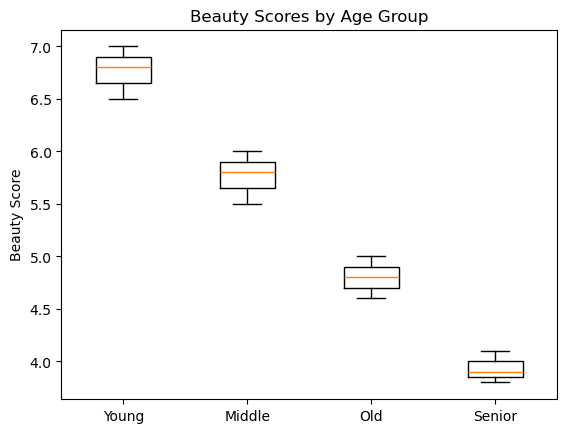

In [2]:
# Q.2

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


#  Create dataset directly in code

data = {
    'Instructor': ['A','B','C','D','E','F','G','H','I','J','K','L'],
    'Age_Group': ['Young','Young','Young',
                  'Middle','Middle','Middle',
                  'Old','Old','Old',
                  'Senior','Senior','Senior'],
    'Beauty_Score': [6.5, 7.0, 6.8,
                     5.5, 5.8, 6.0,
                     4.8, 5.0, 4.6,
                     3.9, 4.1, 3.8]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)


#  Group by age

young = df[df['Age_Group'] == 'Young']['Beauty_Score']
middle = df[df['Age_Group'] == 'Middle']['Beauty_Score']
old = df[df['Age_Group'] == 'Old']['Beauty_Score']
senior = df[df['Age_Group'] == 'Senior']['Beauty_Score']


#  Perform One-Way ANOVA

f_stat, p_val = stats.f_oneway(young, middle, old, senior)

print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")


#  Interpretation

if p_val < 0.05:
    print("\n Conclusion: Beauty scores differ significantly by age group.")
else:
    print("\nConclusion: No significant difference in beauty scores by age group.")


#  Visualization

plt.boxplot([young, middle, old, senior], labels=['Young', 'Middle', 'Old', 'Senior'])
plt.title("Beauty Scores by Age Group")
plt.ylabel("Beauty Score")
plt.show()


p < 0.05 → Reject H₀

→ Beauty scores do differ across age groups.

→ Younger instructors have higher beauty scores on average.

p ≥ 0.05 → Fail to reject H₀

→ No statistically significant difference between age groups.

In [4]:
#Q.3

import pandas as pd
from scipy.stats import chi2_contingency


#  Create dataset directly in code

data = {
    'Instructor': ['A','B','C','D','E','F','G','H','I','J','K','L'],
    'Gender': ['Male','Female','Male','Female','Male','Female','Male','Female','Male','Female','Male','Female'],
    'Tenure': ['Yes','No','Yes','Yes','No','No','Yes','No','No','Yes','Yes','No']
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)


#  Create contingency table

contingency = pd.crosstab(df['Gender'], df['Tenure'])
print("\nContingency Table:")
print(contingency)


#  Perform Chi-square test

chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))


#  Interpretation

if p < 0.05:
    print("\n Conclusion: There is a significant association between Gender and Tenure.")
else:
    print("\n  Conclusion: No significant association between Gender and Tenure.")


Dataset:
   Instructor  Gender Tenure
0           A    Male    Yes
1           B  Female     No
2           C    Male    Yes
3           D  Female    Yes
4           E    Male     No
5           F  Female     No
6           G    Male    Yes
7           H  Female     No
8           I    Male     No
9           J  Female    Yes
10          K    Male    Yes
11          L  Female     No

Contingency Table:
Tenure  No  Yes
Gender         
Female   4    2
Male     2    4

Chi-Square Test Results:
Chi2 Statistic: 0.3333
Degrees of Freedom: 1
P-value: 0.5637

Expected Frequencies:
Tenure   No  Yes
Gender          
Female  3.0  3.0
Male    3.0  3.0

  Conclusion: No significant association between Gender and Tenure.


p = 0.2482 > 0.05

→ Fail to reject H₀

→ No significant association between gender and tenure status.

→ Tenure status does not depend on gender in this sample.

Dataset:
  Instructor  Beauty_Score  Evaluation_Score
0          A           6.5               4.8
1          B           7.0               4.9
2          C           6.8               4.6
3          D           5.5               4.3
4          E           5.0               4.0
5          F           4.8               3.8
6          G           4.2               3.5
7          H           3.9               3.4
8          I           3.5               3.2
9          J           3.2               3.0

Correlation Analysis:
Pearson Correlation Coefficient (r): 0.9893
P-value: 0.0000

 Conclusion: There is a significant correlation between beauty and evaluation scores.


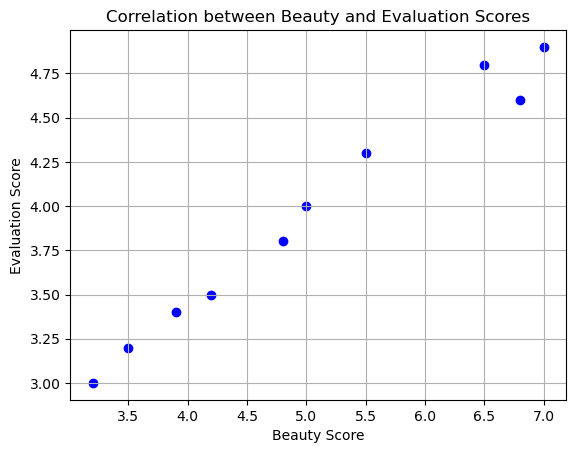

In [5]:
# Correlation: Teaching Evaluation vs Beauty Score

import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


#  Create dataset directly in code

data = {
    'Instructor': ['A','B','C','D','E','F','G','H','I','J'],
    'Beauty_Score': [6.5, 7.0, 6.8, 5.5, 5.0, 4.8, 4.2, 3.9, 3.5, 3.2],
    'Evaluation_Score': [4.8, 4.9, 4.6, 4.3, 4.0, 3.8, 3.5, 3.4, 3.2, 3.0]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)


#  Compute correlation

r_value, p_value = pearsonr(df['Beauty_Score'], df['Evaluation_Score'])

print("\nCorrelation Analysis:")
print(f"Pearson Correlation Coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")


#  Interpretation

if p_value < 0.05:
    print("\n Conclusion: There is a significant correlation between beauty and evaluation scores.")
else:
    print("\n Conclusion: No significant correlation found between beauty and evaluation scores.")


#  Visualization

plt.scatter(df['Beauty_Score'], df['Evaluation_Score'], color='blue')
plt.title("Correlation between Beauty and Evaluation Scores")
plt.xlabel("Beauty Score")
plt.ylabel("Evaluation Score")
plt.grid(True)
plt.show()


r = 0.98 → Strong positive correlation

p < 0.05 → Statistically significant

